In [1]:
# Import findspark and initialise.
import findspark
findspark.init()

In [2]:
# Import packages
import pyspark
import os
import sys
import time



from pyspark.sql import SparkSession
from pyspark.sql.functions import month, col

In [3]:
# Initialize a Spark session
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/18 18:58:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Load the data into a DataFrame (assuming a CSV file for this example)
data_path = "flu_data_3.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

In [5]:
# Display DataFrame
df.show()

+-----------+--------------------+----+----+---------------+-------+---------+---------+--------+---------+------+--------+-----------------+--------------+
|REGION TYPE|              REGION|YEAR|WEEK|%UNWEIGHTED ILI|AGE 0-4|AGE 25-49|AGE 25-64|AGE 5-24|AGE 50-64|AGE 65|ILITOTAL|NUM. OF PROVIDERS|TOTAL PATIENTS|
+-----------+--------------------+----+----+---------------+-------+---------+---------+--------+---------+------+--------+-----------------+--------------+
|     States|             Alabama|2020|  40|        1.11126|  32582|      773|     1146|     352|     1246|   616|     408|               91|         36715|
|     States|              Alaska|2020|  40|        1.76528|   3010|       46|        2|       1|        0|     0|      54|               12|          3059|
|     States|             Arizona|2020|  40|          1.025|   5949|     3629|      747|       2|       97|    15|     107|               24|         10439|
|     States|            Arkansas|2020|  40|        1.1807

In [6]:
# Drop the 'REGION TYPE' column
df = df.drop('REGION TYPE')

In [7]:
# Print the DataFrame
df.show()

+--------------------+----+----+---------------+-------+---------+---------+--------+---------+------+--------+-----------------+--------------+
|              REGION|YEAR|WEEK|%UNWEIGHTED ILI|AGE 0-4|AGE 25-49|AGE 25-64|AGE 5-24|AGE 50-64|AGE 65|ILITOTAL|NUM. OF PROVIDERS|TOTAL PATIENTS|
+--------------------+----+----+---------------+-------+---------+---------+--------+---------+------+--------+-----------------+--------------+
|             Alabama|2020|  40|        1.11126|  32582|      773|     1146|     352|     1246|   616|     408|               91|         36715|
|              Alaska|2020|  40|        1.76528|   3010|       46|        2|       1|        0|     0|      54|               12|          3059|
|             Arizona|2020|  40|          1.025|   5949|     3629|      747|       2|       97|    15|     107|               24|         10439|
|            Arkansas|2020|  40|        1.18079|  10996|     2718|     1444|      18|       35|    33|     180|               53| 

**Average in each State**

In [8]:
# Get the list of unique states
state_list = [row['REGION'] for row in df.select('REGION').distinct().collect()]
state_list

['Utah',
 'Hawaii',
 'Minnesota',
 'Ohio',
 'Arkansas',
 'Oregon',
 'Texas',
 'North Dakota',
 'Pennsylvania',
 'Connecticut',
 'Nebraska',
 'Vermont',
 'Nevada',
 'Puerto Rico',
 'Washington',
 'Illinois',
 'Oklahoma',
 'Virgin Islands',
 'District of Columbia',
 'Delaware',
 'Alaska',
 'New Mexico',
 'West Virginia',
 'Missouri',
 'Rhode Island',
 'Georgia',
 'Montana',
 'Michigan',
 'Virginia',
 'North Carolina',
 'Wyoming',
 'Kansas',
 'New Jersey',
 'Maryland',
 'Alabama',
 'Arizona',
 'Iowa',
 'Massachusetts',
 'New York City',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'New Hampshire',
 'Tennessee',
 'Florida',
 'Indiana',
 'Idaho',
 'South Carolina',
 'South Dakota',
 'California',
 'New York',
 'Wisconsin',
 'Colorado',
 'Maine',
 'Commonwealth of the Northern Mariana Islands']

In [13]:
from pyspark.sql.functions import mean


# Select the numeric columns that you want to average
numeric_columns = ['WEEK', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

# Apply the mean function to only numeric columns
average_by_state = df.groupBy('REGION').agg(*[mean(col(c)).alias(c) for c in numeric_columns if c != 'NUM. OF PROVIDERS'])  # Exclude for now

# Show the resulting DataFrame
average_by_state.show()

+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|              REGION|              WEEK|   %UNWEIGHTED ILI|           AGE 0-4|         AGE 25-49|         AGE 25-64|          AGE 5-24|         AGE 50-64|            AGE 65|          ILITOTAL|    TOTAL PATIENTS|
+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|                Utah|28.147058823529413|1.9836965588235294| 8921.317647058824| 4434.505882352942|2523.3764705882354|1107.7117647058824| 641.5764705882353| 718.4705882352941| 371.5705882352941| 18346.95882352941|
|              Hawaii|28.147058823529413|1.8885329647058828| 5727.105882352941|4006.1176470588234|1845.9882352941177| 907.8823529411765|379.94117647

In [35]:
average_by_state.printSchema()

root
 |-- REGION: string (nullable = true)
 |-- WEEK: double (nullable = true)
 |-- %UNWEIGHTED ILI: double (nullable = true)
 |-- AGE 0-4: double (nullable = true)
 |-- AGE 25-49: double (nullable = true)
 |-- AGE 25-64: double (nullable = true)
 |-- AGE 5-24: double (nullable = true)
 |-- AGE 50-64: double (nullable = true)
 |-- AGE 65: double (nullable = true)
 |-- ILITOTAL: double (nullable = true)
 |-- TOTAL PATIENTS: double (nullable = true)



In [36]:
# Convert the averages to a Pandas DataFrame for plotting
average_by_state_pd = average_by_state.toPandas()

In [37]:
average_by_state.printSchema()

root
 |-- REGION: string (nullable = true)
 |-- WEEK: double (nullable = true)
 |-- %UNWEIGHTED ILI: double (nullable = true)
 |-- AGE 0-4: double (nullable = true)
 |-- AGE 25-49: double (nullable = true)
 |-- AGE 25-64: double (nullable = true)
 |-- AGE 5-24: double (nullable = true)
 |-- AGE 50-64: double (nullable = true)
 |-- AGE 65: double (nullable = true)
 |-- ILITOTAL: double (nullable = true)
 |-- TOTAL PATIENTS: double (nullable = true)



In [38]:
average_by_state_pd = average_by_state_pd.rename(columns={"%UNWEIGHTED ILI": "UNWEIGHTED_ILI"})

In [32]:
average_by_state_pd = average_by_state_pd.sort_values('REGION')

In [39]:
average_by_state_pd

,REGION,WEEK,UNWEIGHTED_ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS
0,Utah,28.147059,1.983697,8921.317647,4434.505882,2523.376471,1107.711765,641.576471,718.470588,371.570588,18346.958824
1,Hawaii,28.147059,1.888533,5727.105882,4006.117647,1845.988235,907.882353,379.941176,523.441176,374.229412,13390.476471
2,Minnesota,28.147059,1.350764,16709.688235,8914.258824,4480.594118,2180.335294,916.323529,1091.376471,464.258824,34292.576471
3,Ohio,28.147059,2.375353,15590.994118,7642.352941,3613.341176,2044.052941,1099.417647,1391.670588,870.388235,31381.829412
4,Arkansas,28.147059,1.877680,7515.111765,3860.947059,1932.052941,965.641176,518.676471,420.000000,294.576471,15212.429412
5,Oregon,28.147059,1.325246,19367.005882,10215.347059,3874.117647,2495.900000,1110.076471,1179.488235,519.335294,38241.935294
6,Texas,28.147059,3.084164,23714.076471,14574.782353,6658.123529,3007.029412,1722.641176,1270.952941,1604.988235,50947.605882
7,North Dakota,28.147059,2.347879,1515.282353,803.329412,363.935294,181.088235,117.352941,110.658824,73.476471,3091.647059
8,Pennsylvania,28.147059,1.321069,31546.482353,15185.741176,8263.835294,4913.129412,1809.111765,2179.523529,863.517647,63897.823529
9,Connecticut,28.147059,1.722948,20760.664706,12051.852941,5124.223529,2606.441176,1140.123529,1176.729412,768.129412,42860.035294


In [49]:
average_by_state_pd = average_by_state_pd.sort_values(by='REGION', ascending=True)

In [50]:
x_values = average_by_state_pd['REGION']

In [51]:
y_values = average_by_state_pd['UNWEIGHTED_ILI']

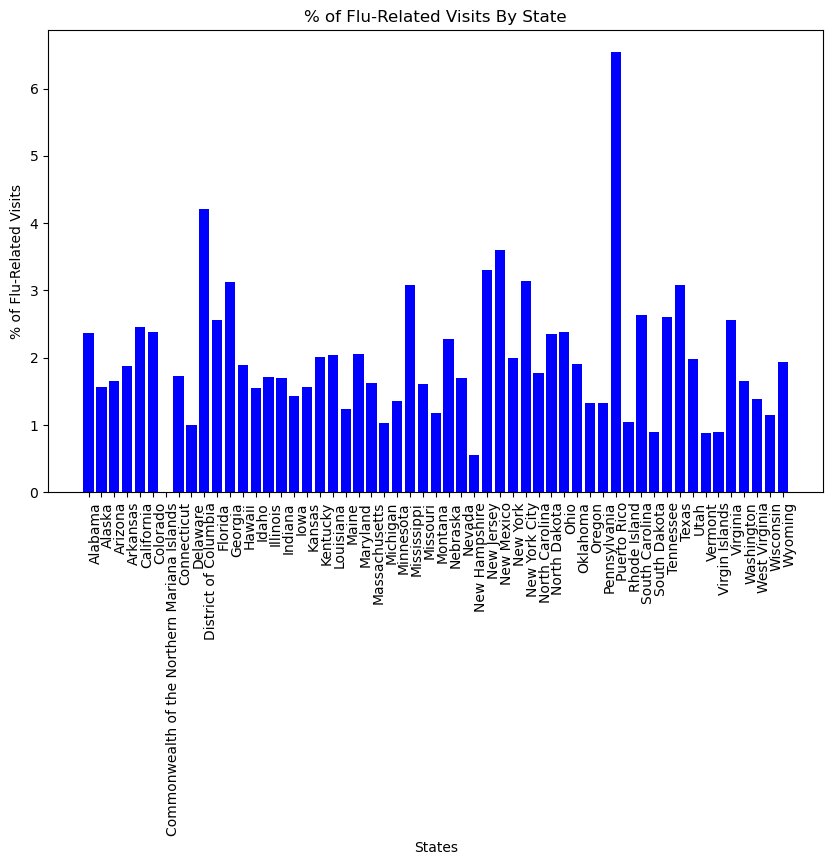

In [52]:
import matplotlib.pyplot as plt

# Create graph
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='blue')

# Labels
plt.xlabel('States')
plt.ylabel('% of Flu-Related Visits')
plt.title('% of Flu-Related Visits By State')

plt.xticks(rotation=90, ha='right', rotation_mode='anchor')

plt.show()

**People are Affected by it in each State**

In [54]:
df

DataFrame[REGION: string, YEAR: int, WEEK: int, %UNWEIGHTED ILI: double, AGE 0-4: int, AGE 25-49: int, AGE 25-64: int, AGE 5-24: int, AGE 50-64: int, AGE 65: int, ILITOTAL: int, NUM. OF PROVIDERS: int, TOTAL PATIENTS: int]

In [60]:
df.printSchema()

root
 |-- REGION: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- WEEK: integer (nullable = true)
 |-- %UNWEIGHTED ILI: double (nullable = true)
 |-- AGE 0-4: integer (nullable = true)
 |-- AGE 25-49: integer (nullable = true)
 |-- AGE 25-64: integer (nullable = true)
 |-- AGE 5-24: integer (nullable = true)
 |-- AGE 50-64: integer (nullable = true)
 |-- AGE 65: integer (nullable = true)
 |-- ILITOTAL: integer (nullable = true)
 |-- NUM. OF PROVIDERS: integer (nullable = true)
 |-- TOTAL PATIENTS: integer (nullable = true)



In [72]:
from pyspark.sql.functions import sum


# Select the numeric columns that you want to average
numeric_columns = ['WEEK', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

# Apply the mean function to only numeric columns
sum_by_state = df.groupBy('REGION').agg(*[sum(col(c)).alias(c) for c in numeric_columns if c != 'NUM. OF PROVIDERS'])  # Exclude for now


In [73]:
sum_by_state_pdtwo = sum_by_state.toPandas()

In [74]:
sum_by_state_pdtwo = sum_by_state_pdtwo.sort_values(by='REGION', ascending=True)

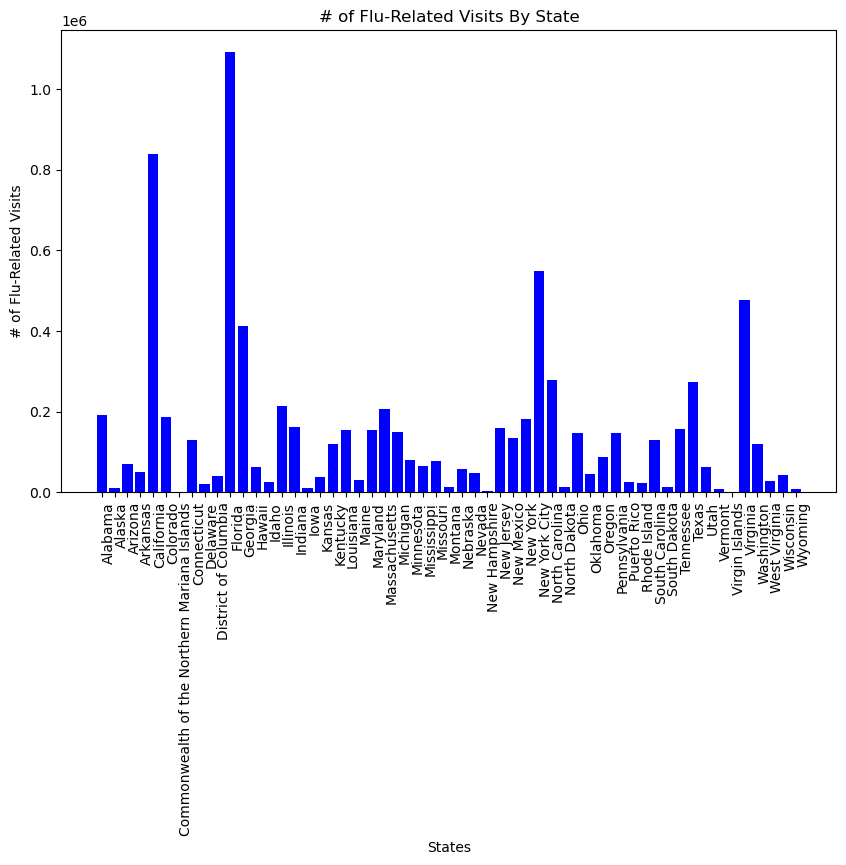

In [78]:
x_values = sum_by_state_pdtwo['REGION']
y_values = sum_by_state_pdtwo['ILITOTAL']


#create graph
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='blue')

#labels
plt.xlabel('States')
plt.ylabel('# of Flu-Related Visits')
plt.title('# of Flu-Related Visits By State')

plt.xticks(rotation=90, ha='right', rotation_mode='anchor')

plt.show()

**Age Brackets in each State**

In [80]:
average_0_4= average_by_state_pd['AGE 0-4'].mean()
average_0_4

17286.9694117647

In [81]:
average_5_24= average_by_state_pd['AGE 5-24'].mean()
average_5_24


2166.851336898396

In [82]:
average_25_49= average_by_state_pd['AGE 25-49'].mean()
average_25_49


8870.37422459893

In [83]:
average_50_64= average_by_state_pd['AGE 50-64'].mean()
average_50_64


1025.480213903743

In [84]:
average_65= average_by_state_pd['AGE 65'].mean()
average_65


1088.5897326203208

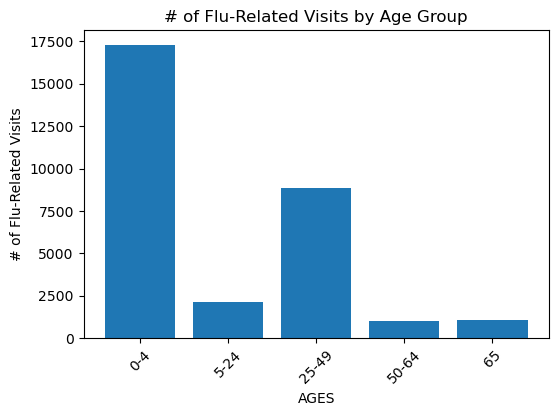

In [85]:
#create bar graph of flur related visits by age group
x_axis= ['0-4', '5-24', '25-49', '50-64', '65']
y_axis= [average_0_4, average_5_24, average_25_49, average_50_64, average_65]

plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis)

#customize
plt.xlabel('AGES')
plt.ylabel('# of Flu-Related Visits')
plt.title('# of Flu-Related Visits by Age Group')
plt.xticks(rotation= 45)

plt.show()

**Time of the year it affects the People Most**

In [88]:
flu_data_new = df.toPandas()

In [89]:
flu_data_new= flu_data_new.drop(columns=['REGION', 'YEAR',])

#flu_data_new.reset_index('WEEK', inplace= True)

flu_data_new


,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,40,1.111260,32582,773,1146,352,1246,616,408,91,36715
1,40,1.765280,3010,46,2,1,0,0,54,12,3059
2,40,1.025000,5949,3629,747,2,97,15,107,24,10439
3,40,1.180790,10996,2718,1444,18,35,33,180,53,15244
4,40,0.849375,27051,9827,6491,5494,5208,3383,488,110,57454
...,...,...,...,...,...,...,...,...,...,...,...
9345,52,10.986700,1175,479,101,27,65,28,206,12,1875
9346,52,0.000000,0,0,0,0,0,0,0,0,0
9347,52,5.761320,1342,36,63,12,2,3,84,5,1458
9348,52,5.136990,202,273,67,1,31,10,30,2,584


In [90]:
#create graph highlithging time of the year that flu affects people the most
flu_data_by_week= flu_data_new.groupby('WEEK').mean()

flu_data_by_week.reset_index('WEEK', inplace= True)

flu_data_by_week


,WEEK,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1,2.818583,14924.909091,9663.872727,4197.769697,3728.296970,1049.630303,1507.684848,1232.327273,62.066667,35072.163636
1,2,2.295205,15411.557576,10525.921212,3534.987879,1884.721212,1170.266667,964.636364,920.478788,61.854545,33492.090909
2,3,2.061404,16094.824242,8135.351515,3541.709091,2114.739394,970.987879,874.757576,731.600000,62.054545,31732.369697
3,4,1.750173,15582.654545,8921.993939,4244.151515,1346.557576,745.745455,778.903030,642.090909,61.909091,31620.006061
4,5,1.582099,14519.345455,8049.436364,4443.169697,1962.927273,717.951515,1398.969697,591.260606,61.460606,31091.800000
5,6,1.513553,14240.496970,9779.169697,4189.945455,2551.309091,581.606061,696.284848,584.430303,61.527273,32038.812121
6,7,1.495438,16146.866667,7270.157576,4008.696970,1320.090909,1325.490909,1259.624242,561.448485,61.327273,31330.927273
7,8,1.396570,16039.703030,7427.575758,4885.157576,1985.315152,711.515152,832.793939,549.987879,61.606061,31882.060606
8,9,1.418901,17508.151515,6090.539394,4298.757576,2672.769697,1215.903030,964.060606,551.412121,61.654545,32750.181818
9,10,1.454913,16988.745455,8717.333333,3473.060606,1804.466667,736.278788,1129.303030,564.872727,61.769697,32849.187879


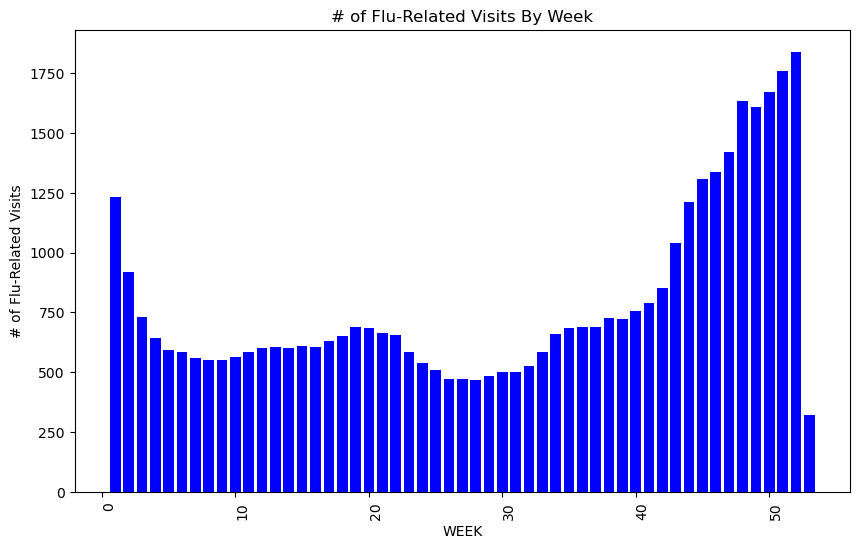

In [91]:
x_values= flu_data_by_week['WEEK']
y_values= flu_data_by_week['ILITOTAL']

#create graph
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color= 'blue')

#labels
plt.xlabel('WEEK')
plt.ylabel('# of Flu-Related Visits')
plt.title('# of Flu-Related Visits By Week')

plt.xticks(rotation=90, ha='right', rotation_mode='anchor')

plt.show()

In [21]:
# Stop the Spark session
spark.stop()